## **PROJECT - Classifying Colored Images of Cats and Dogs**

#### Details
- Convert the dimensions of the images to 28 x 28 pixels.
- The dataset consists of:
  - 2000 training images (1000 cats and 1000 dogs)
  - 1000 validation images (500 cats and 500 dogs)
  - 1000 test images (500 cats and 500 dogs)
- We will use data augmentation to improve model performance through various transformations.
- Further improvements in model performance will be achieved using transfer earning.


In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# Read and load the data from their various directories
train_dir = r'C:\Users\HP\Downloads\cats_and_dogs_small\train'
validation_dir = r'C:\Users\HP\Downloads\cats_and_dogs_small\validation'
test_dir = r'C:\Users\HP\Downloads\cats_and_dogs_small\test'

### Data Preprocessing

#### Steps:
- Decode the jpeg images to rgb pixels grids
- Convert the grids into floating point tensors
- Rescale the pixel values to (0, 1) interval

In [4]:
# Import the library to perform all the preprocessing steps
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Generating batches of tensor image data, rescale, set target size and batch size

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# Import the libraries for training the neural network
from tensorflow.keras import layers, models, optimizers

In [7]:
# Arranging the layers in sequence

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilig
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Fit the model

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - accuracy: 0.4926 - loss: 0.7023 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.5103 - loss: 0.6933 - val_accuracy: 0.5210 - val_loss: 0.6905
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.5599 - loss: 0.6845 - val_accuracy: 0.5400 - val_loss: 0.6722
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.5668 - loss: 0.6820 - val_accuracy: 0.5360 - val_loss: 0.7056
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.5784 - loss: 0.6657 - val_accuracy: 0.5170 - val_loss: 0.6798
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.5526 - loss: 0.6711 - val_accuracy: 0.5010 - val_loss: 0.7145
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.5643 - loss: 0.6549 - val_accuracy: 0.5880 - val_loss: 0.6478
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.5914 - loss: 0.6481 - val_accu

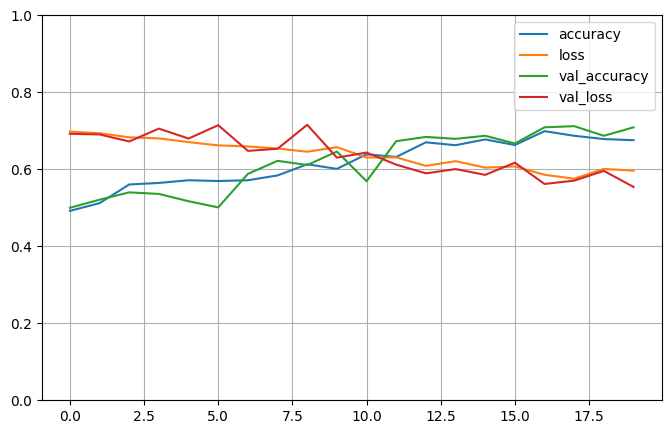

In [10]:
# Plot the actual data and validation data loss and accuracy

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
# Save the model
model.save('CNN_cat_and_dogs.keras')